### 그리드 서치

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [15]:
# 데이터 로드
df = pd.read_csv('./data/gym_churn_us.csv')
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# 모델 정의
model = DecisionTreeClassifier()

# 하이퍼파라미터 그리드 설정
param_grid = {
    # 트리의 최대 깊이. 과적합을 방지하기 위해 사용합니다.
    'max_depth': [None] + [i for i in range(1, 15 + 1)],
    # 내부 노드를 분할하기 위한 최소 샘플 수. 이 값이 높을수록 과적합을 줄일 수 있습니다.
    'min_samples_split': [i for i in range(2, 10)],
    'random_state' : [42]
}

In [17]:
# 그리드 서치 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [42]},
             scoring='accuracy')

In [18]:
# 최적의 파라미터 및 성능 확인
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 분류 성능 보고서
# precision, recall, f1-score: 각 클래스에 대한 성능 지표.
# support: 각 클래스의 실제 샘플 수.
# accuracy: 전체 정확도.
# macro avg: 각 클래스의 평균을 단순 평균한 것.
# weighted avg: 각 클래스의 성능 지표를 샘플 수로 가중 평균한 것

print(classification_report(y_test, y_pred))

최적의 파라미터: {'max_depth': 5, 'min_samples_split': 2, 'random_state': 42}
최고 정확도: 0.9060714285714285
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       897
           1       0.79      0.74      0.76       303

    accuracy                           0.88      1200
   macro avg       0.85      0.84      0.84      1200
weighted avg       0.88      0.88      0.88      1200



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.8842
Test Precision: 0.7867
Test Recall: 0.7426
Test F1 Score: 0.7640


### KFold

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./data/gym_churn_us.csv')
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [3]:
from sklearn.model_selection import KFold

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [5]:
model = DecisionTreeClassifier(random_state=42)

In [6]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       598
           1       0.75      0.73      0.74       202

    accuracy                           0.87       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.87      0.87      0.87       800

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       593
           1       0.80      0.79      0.79       207

    accuracy                           0.89       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.89      0.89      0.89       800

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       591
           1       0.75      0.80      0.77       209

    accuracy                           0.88       800
   macro avg       0.84      0.85      0.84       800
weighted avg       0.88      0.88      0.88       800

              preci

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.8962
Test Precision: 0.8341
Test Recall: 0.8017
Test F1 Score: 0.8176


### RandomForest

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('./data/gym_churn_us.csv')
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(random_state=42)

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.9108
Test Precision: 0.8403
Test Recall: 0.7987
Test F1 Score: 0.8190


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       897
           1       0.84      0.80      0.82       303

    accuracy                           0.91      1200
   macro avg       0.89      0.87      0.88      1200
weighted avg       0.91      0.91      0.91      1200



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

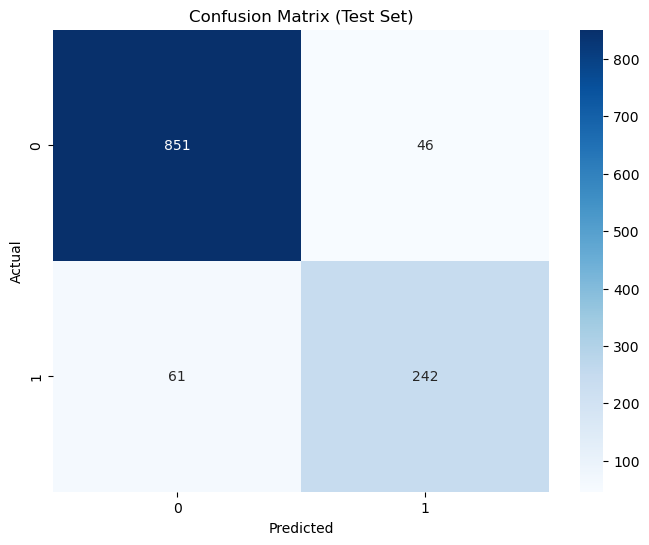

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

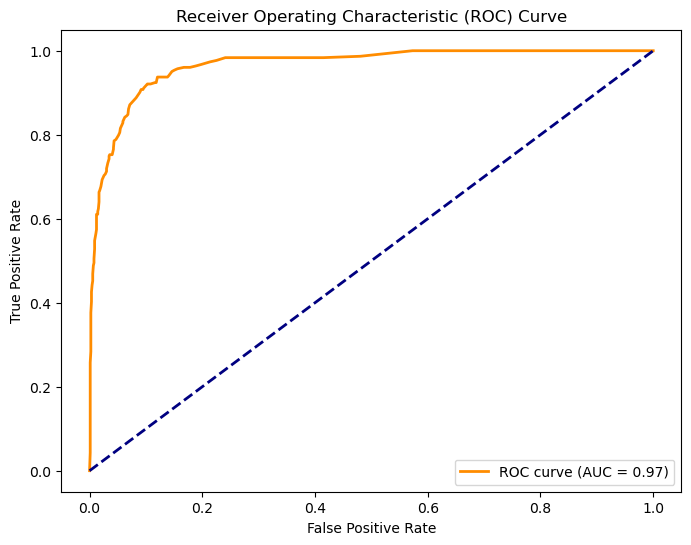

In [28]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### AdaBoost

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/gym_churn_us.csv')
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.ensemble import AdaBoostClassifier

In [4]:
# 약한 학습기로 결정 트리 사용
base_estimator = DecisionTreeClassifier(max_depth=1)

In [5]:
# AdaBoost 모델 초기화
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\churn\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.9225
Test Precision: 0.8646
Test Recall: 0.8218
Test F1 Score: 0.8426


In [10]:
# 성능 보고서
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       897
           1       0.86      0.82      0.84       303

    accuracy                           0.92      1200
   macro avg       0.90      0.89      0.90      1200
weighted avg       0.92      0.92      0.92      1200



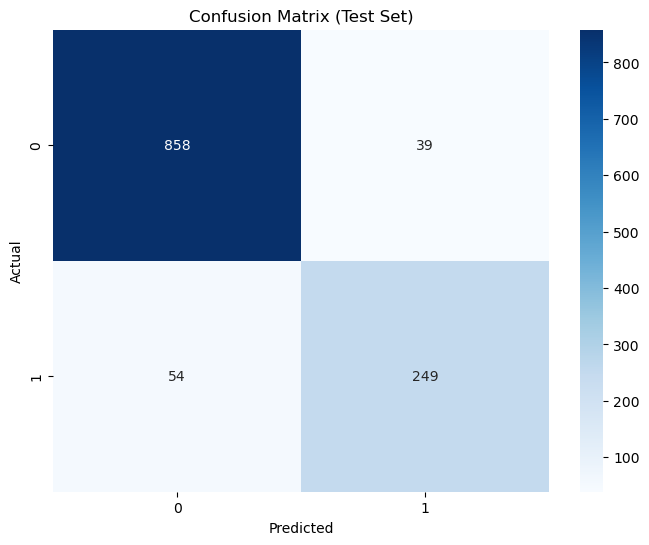

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

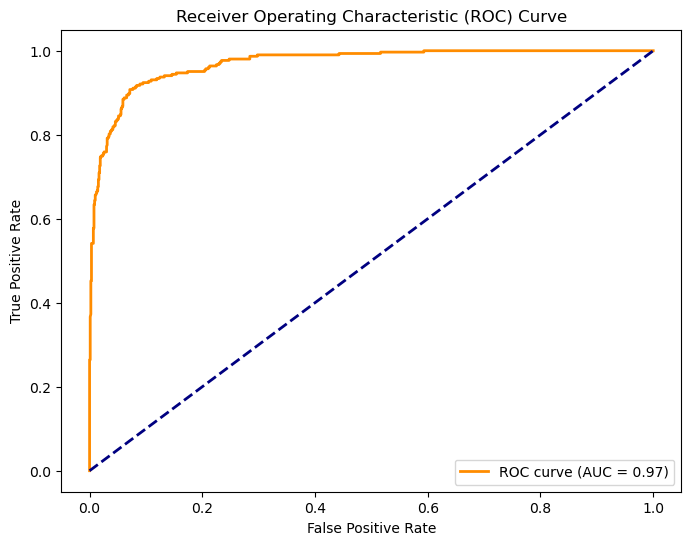

In [14]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 그리드 서치 + K겹 교차검증 + 랜덤 포레스트

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [24]:
df = pd.read_csv('./data/gym_churn_us.csv')
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    # 랜덤 포레스트에 포함할 결정 트리의 수입니다. 기본값은 100입니다. 이 값이 클수록 모델의 성능이 향상될 수 있지만, 계산 비용도 증가합니다.
    'n_estimators': [10, 50, 100, 150],
    # 트리의 최대 깊이. 과적합을 방지하기 위해 사용합니다.
    'max_depth': [None] + [i for i in range(1, 15 + 1)],
    # 내부 노드를 분할하기 위한 최소 샘플 수. 이 값이 높을수록 과적합을 줄일 수 있습니다.
    'min_samples_split': [i for i in range(2, 10)],
    'random_state' : [42]
}

In [26]:
# StratifiedKFold는 Scikit-learn에서 제공하는 교차 검증 방법 중 하나로, 데이터를 K개의 폴드로 나눌 때 각 폴드의 클래스 비율을 원본 데이터와 동일하게 유지하는 방법입니다
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
# 그리드 서치 설정
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=cv_strategy)

In [28]:
# 그리드 서치 실행
grid_search.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 150],
                         'random_state': [42]})

In [29]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_split=3, n_estimators=150,
                       random_state=42)

In [32]:
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":grid_search.best_estimator_.feature_importances_})
coef

,feature_names,coefficient
0,gender,0.009303
1,Partner,0.009718
2,Promo_friends,0.009544
3,Contract_period,0.068282
4,Group_visits,0.014052
5,Age,0.122180
6,Avg_additional_charges_total,0.080374
7,Month_to_end_contract,0.088200
8,Lifetime,0.295080
9,Avg_class_frequency_total,0.131029


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns       
from sklearn.metrics import roc_curve, roc_auc_score 

In [9]:
y_pred = grid_search.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.9150
Test Precision: 0.8478
Test Recall: 0.8086
Test F1 Score: 0.8277


In [10]:
print("최적의 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
print(classification_report(y_test, y_pred))

최적의 파라미터: {'max_depth': 14, 'min_samples_split': 3, 'n_estimators': 150, 'random_state': 42}
최고 정확도: 0.9257142857142856
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       897
           1       0.85      0.81      0.83       303

    accuracy                           0.92      1200
   macro avg       0.89      0.88      0.89      1200
weighted avg       0.91      0.92      0.91      1200



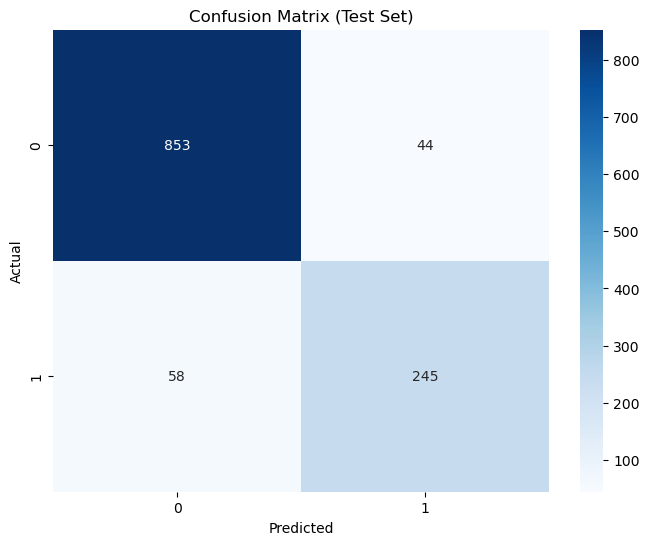

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

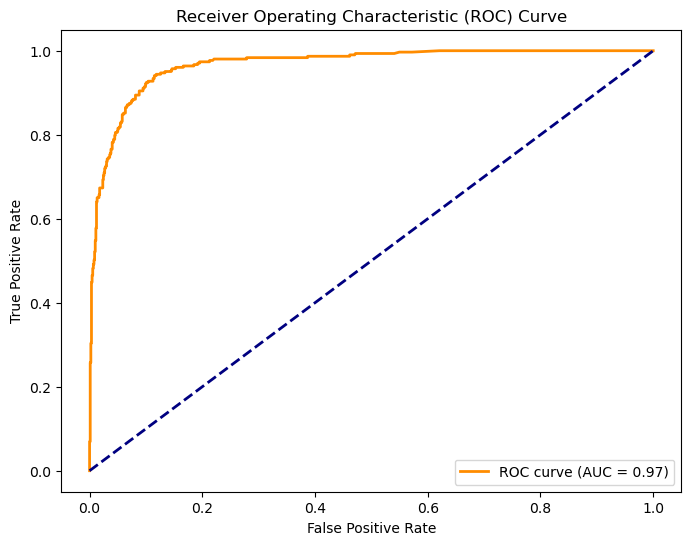

In [13]:
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 모델 비교

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
models = ['DecisionTree','GridSearch','KFold', 'Random Forest', 'Grid+KFold+RF', 'AdaBoost']

# accuracy, precision, recall, f1 score
decisiontree = [0.8875, 0.7819, 0.7690, 0.7754]
gridsearch = [0.8842, 0.7867, 0.7426, 0.7640]
kfold = [0.8962, 0.8341, 0.8017, 0.8176]
randomforest = [0.9108, 0.8403, 0.7987, 0.8190]
grid_kfold_randomforest = [0.9150, 0.8478, 0.8086, 0.8277]
adaboost = [0.9225, 0.8646, 0.8218, 0.8426]

In [17]:
accuracy = [decisiontree[0], gridsearch[0], kfold[0], randomforest[0], grid_kfold_randomforest[0], adaboost[0]]
precision = [decisiontree[1], gridsearch[1], kfold[1], randomforest[1], grid_kfold_randomforest[1], adaboost[1]]
recall = [decisiontree[2], gridsearch[2], kfold[2], randomforest[2], grid_kfold_randomforest[2], adaboost[2]]
f1_score = [decisiontree[3], gridsearch[3], kfold[3], randomforest[3], grid_kfold_randomforest[3], adaboost[3]]


In [18]:
# Set the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

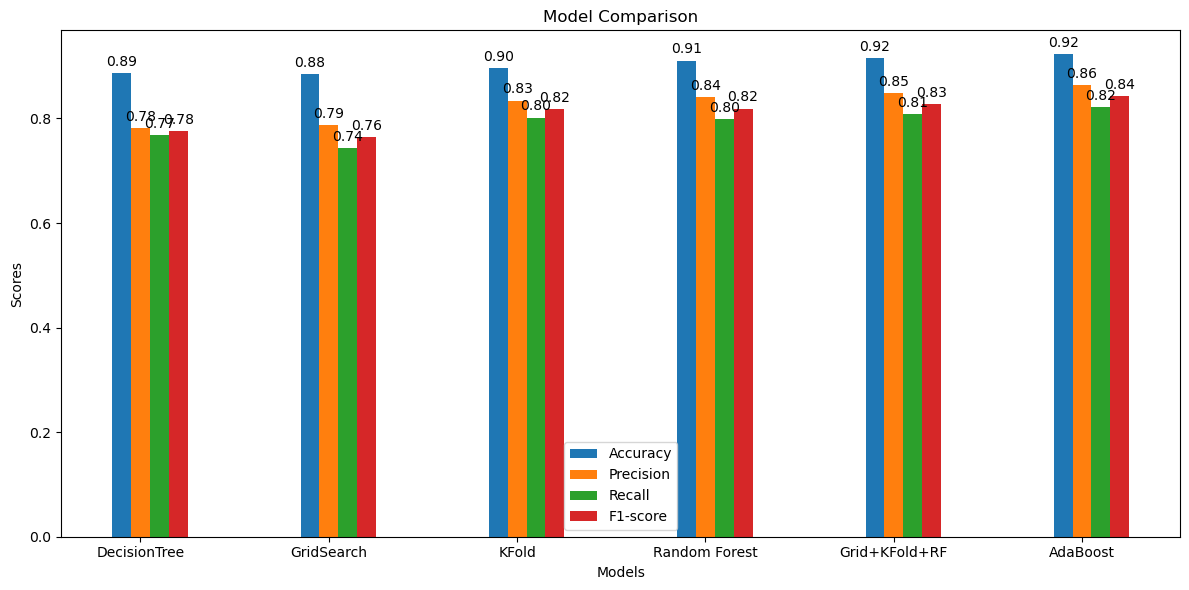

In [22]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(r1, accuracy, bar_width, label='Accuracy')
bars2 = ax.bar(r2, precision, bar_width, label='Precision')
bars3 = ax.bar(r3, recall, bar_width, label='Recall')
bars4 = ax.bar(r4, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)
ax.legend(loc='lower center')

# Add value labels on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(bars4)

# Display the chart
plt.tight_layout()
plt.show()